In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import pickle as pkl

In [2]:
df = pd.read_csv('car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
new_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [8]:
new_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
new_df['years'] = new_df['Year'] - 2000

In [10]:
new_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,14
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,17
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,14


In [11]:
new_df = pd.get_dummies(new_df , drop_first= True)

In [12]:
new_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,14,False,True,False,True
1,2013,4.75,9.54,43000,0,13,True,False,False,True
2,2017,7.25,9.85,6900,0,17,False,True,False,True
3,2011,2.85,4.15,5200,0,11,False,True,False,True
4,2014,4.60,6.87,42450,0,14,True,False,False,True


In [13]:
new_df.replace({'Fuel_Type_Diesel' : {'False' : 0 , 'True' : 1}} , inplace= True)
new_df.replace({'Fuel_Type_Petrol' : {'False' : 0 , 'True' : 1}} , inplace= True)
new_df.replace({'Seller_Type_Individual' : {'False' : 0 , 'True' : 1}} , inplace= True)
new_df.replace({'Transmission_Manual' : {'False' : 0 , 'True' : 1}} , inplace= True)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

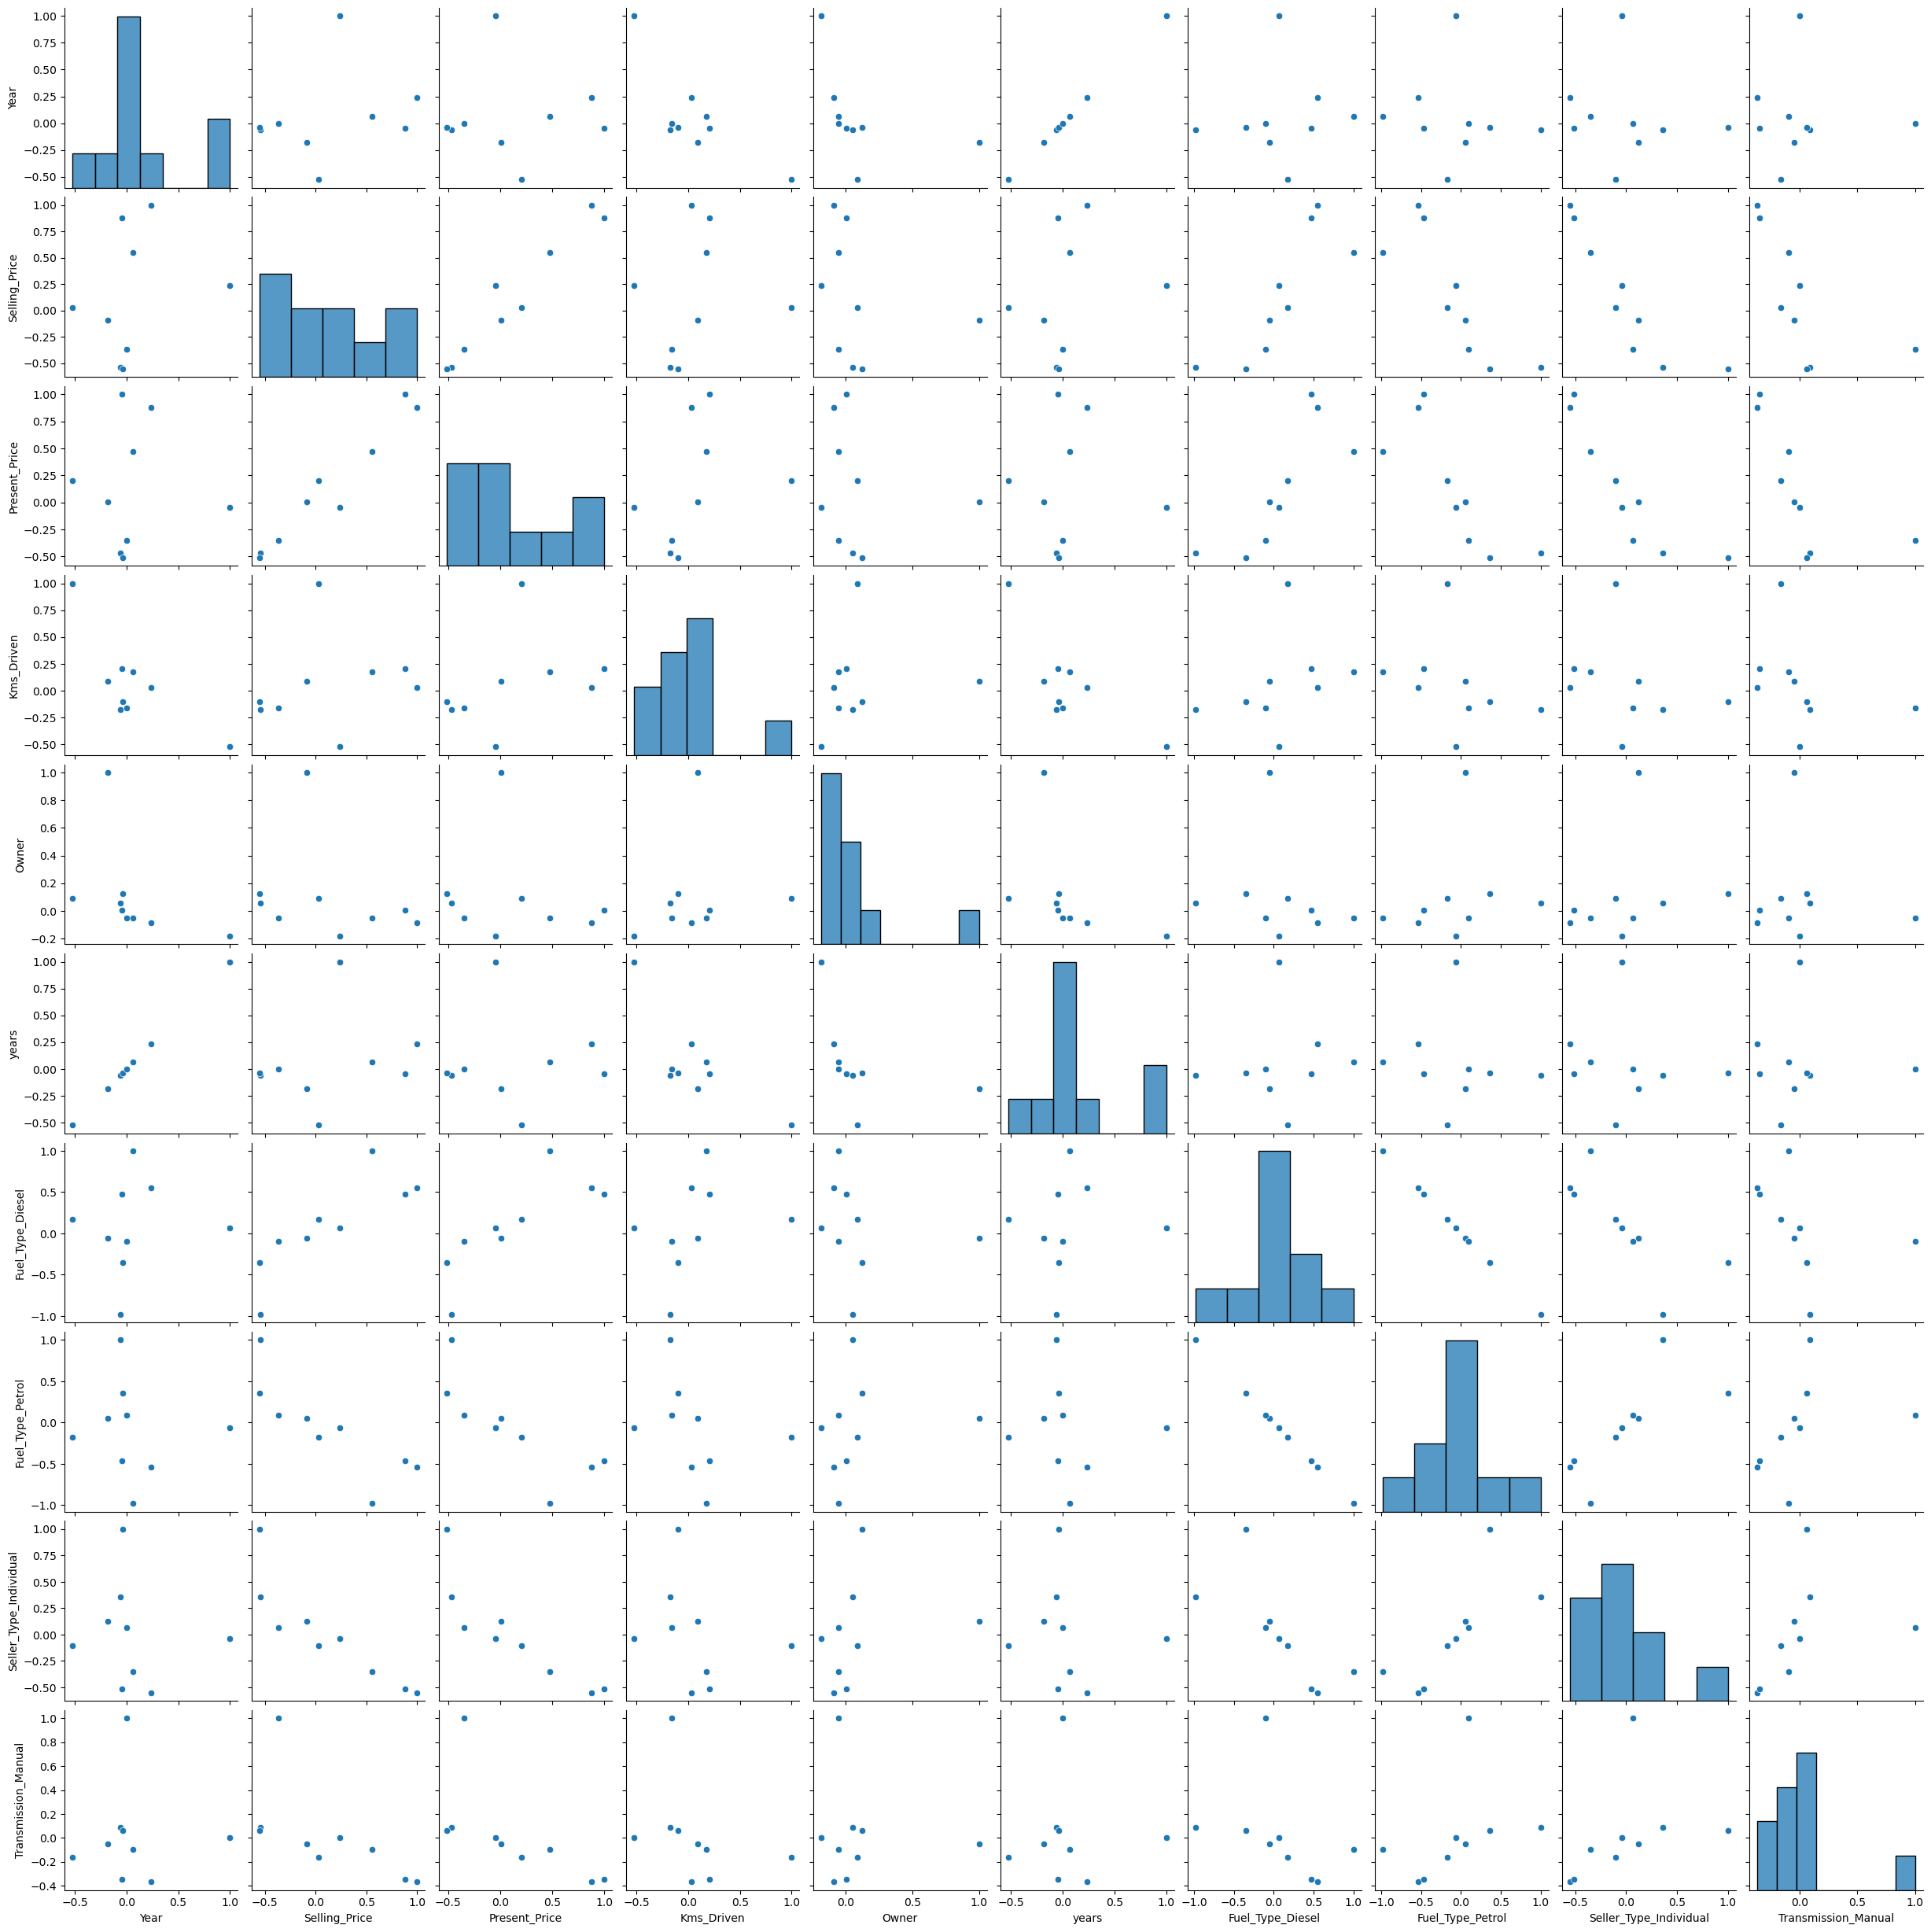

In [14]:
plt.figure(figsize= (10,8))
corrs = new_df.corr()
sns.pairplot(corrs)
plt.show()

In [15]:
X = new_df.iloc[: , 2:]
Y = new_df.iloc[: , 1]

In [16]:
X.head()

,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,14,False,True,False,True
1,9.54,43000,0,13,True,False,False,True
2,9.85,6900,0,17,False,True,False,True
3,4.15,5200,0,11,False,True,False,True
4,6.87,42450,0,14,True,False,False,True


In [17]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [18]:
model = ExtraTreesRegressor()
model.fit(X , Y)

ExtraTreesRegressor()

In [19]:
print(model.feature_importances_)

[0.3762755  0.03855948 0.00167174 0.07818251 0.21952003 0.00958981
 0.13641717 0.13978376]


[]

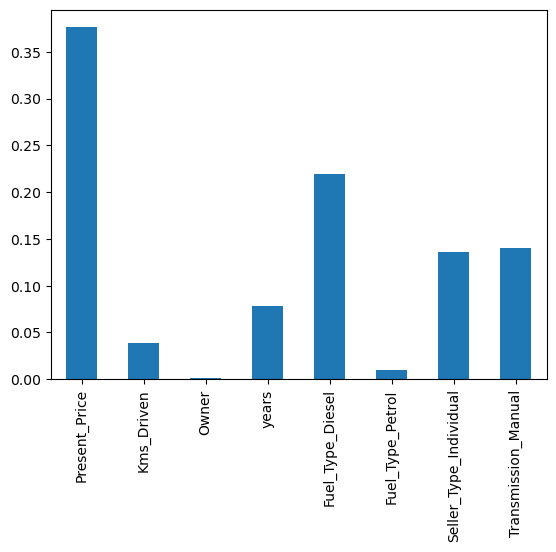

In [20]:
feature_imps = pd.Series(model.feature_importances_ , index= X.columns)
feature_imps.plot(kind= 'bar')
plt.plot()

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.2)

In [22]:
model = RandomForestRegressor()

In [23]:
n_estimators = [int(x) for x in np.linspace(start = 100 , stop= 1200 , num= 12)]
max_features = ['auto' , 'sqrt']
max_depth = [int(x) for x in np.linspace(5 , 30 , 6)]
min_samples_split = [2 , 5 , 10 , 15 , 100]
min_samples_leaf = [1 , 2 , 5 , 10]

In [26]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
random_cv = RandomizedSearchCV(estimator = model , param_distributions = random_grid , scoring = 'neg_mean_squared_error' , n_iter = 10 , verbose = 2 , random_state = 42 , n_jobs = 1 , cv = 5)

In [29]:
random_cv.fit(X_train , Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [30]:
predictions = random_cv.predict(X_test)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


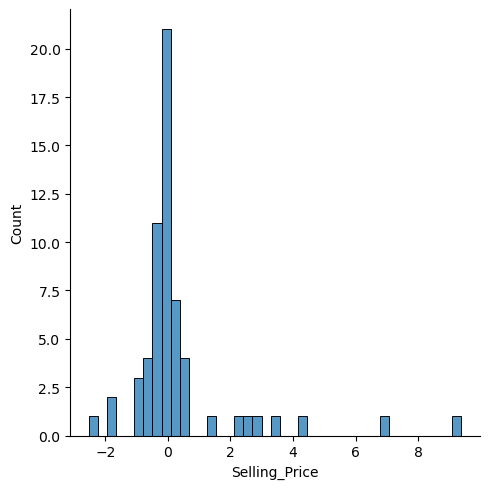

In [33]:
sns.displot(Y_test-predictions)
plt.show()

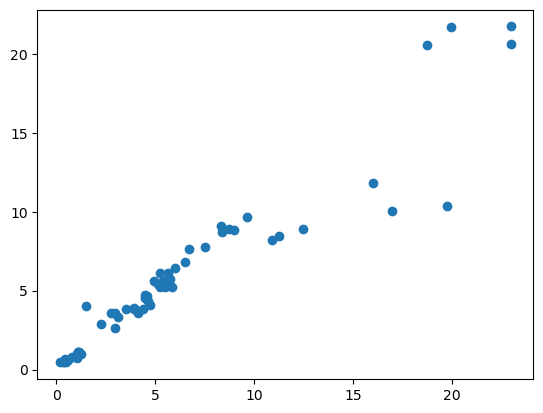

In [34]:
plt.scatter(Y_test , predictions)
plt.show()

In [36]:
file = open('CAR_PRICE_PREDICTION.pkl' , 'wb')
pkl.dump(random_cv , file)